# Product data

All images seem to be of the same (200,200) dimensions, so no further umage scaling is necessary. 

In [143]:
# Imports
import os
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import json

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline  
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [198]:
import collections
from PIL import Image
import requests
from io import BytesIO
import urllib.request
import cv2
from bs4 import BeautifulSoup

In [153]:
def walk_up_folder(path, depth=1):
    """
    Helper method to navigate the file system and get to the file location
    """
    _cur_depth = 1        
    while _cur_depth < depth:
        path = os.path.dirname(path)
        _cur_depth += 1
    return path

def save_fig(directory, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Method to save plots to the directory
    :param directory:
    :param fig_id:
    :param tight_layout:
    :param fig_extension:
    :param resolution:
    :return:
    """
    path = os.path.join(directory, fig_id + "." + fig_extension)
    print("Saving figure : " + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [16]:
data_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_data.json')
categories_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_categories.txt')

# Load and read the data

In [17]:
with open(categories_path, encoding='utf-8') as data_file:
    categories = data_file.read().split("\n")

In [22]:
print(categories)
print("Number of categories : {} ".format(len(categories)))

['Dresses', 'Tops', 'Jeans', 'Skirts', 'Rompers', 'Shoes', 'Bags', 'Jewelry', 'Swimwear', 'Intimates', 'Others']
Number of categories : 11 


In [23]:
with open(data_path, encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

In [25]:
print("Number of data samples : {} ".format(len(data)))

Number of data samples : 1000 


In [28]:
data[0]['description']

"Supersoft speckled French terry makes this (tush covering!) turtleneck-sweatshirt hybrid the layering piece you'll want to wear to the gym, to lunch, to, well, everywhere this winter. Loose fit. Body length: 27 1/2. Cotton. Import."

In [30]:
data[0]['images_url']

'https://www.jcrew.com/s7-img-facade/H3588_PK6317_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200'

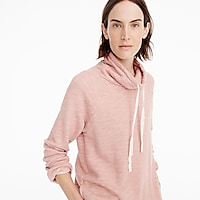

In [34]:
response = requests.get(data[0]['images_url'])
img = Image.open(BytesIO(response.content))
img

In [216]:
text_data_combined= [BeautifulSoup(data[_]['description']).get_text().rstrip('\r\n').replace('\n', ' ').replace('\t', ' ').replace('\\', ' ') for _ in range(len(data))]

In [217]:
text_data_combined

["Supersoft speckled French terry makes this (tush covering!) turtleneck-sweatshirt hybrid the layering piece you'll want to wear to the gym, to lunch, to, well, everywhere this winter. Loose fit. Body length: 27 1/2. Cotton. Import.",
 'Consider this embroidered layer your new dressy sweatshirt this winter. Slim fit. Body length: 24. Cotton. Import.',
 "Shop the Men's Slim American Pima Cotton Oxford Shirt With Mechanical Stretch at J.Crew and see the entire selection of Men's Casual Shirts. Free Shipping Available.",
 "Shop the Women's Off-The-Shoulder Foldover Top at J.Crew and see the entire selection of Women's Knits. Free Shipping Available.",
 "Shop the Women's Ruffle Plunge V-Neck One-Piece Swimsuit at J.Crew and see the entire selection of Women's Swimwear. Free Shipping Available.",
 "Shop the Women's Strappy Knit Midi Dress at J.Crew and see the entire selection of Women's Swimwear. Free Shipping Available.",
 "Shop the Women's Mixed Stripe T-Shirt at J.Crew and see the enti

In [202]:
len(text_data_combined)

1000

In [205]:
text_data_combined[22].strip()

"Limited to 1500 copies on UO-exclusive yellow vinyl, dont smile at me is the debut full-length album by singer-songwriter Billie Eilish. Produced by her brother, it's full of brooding hip hop beats and gloomy, ethereal vocals. Features the singles ocean eyes, bellyache + watch. 2017, Interscope.      \n\n**Tracklisting**   \n1\\. COPYCAT\t\t\t\n2\\. Idontwannabeyouanymore\t\t\t\n3\\. my boy\t\t\t\n4\\. watch \t\t\t\n5\\. party favor\t\t\t\n6\\. bellyache\t\t\t\n7\\. ocean eyes\t\t\t\n8\\. hostage \t\n"

In [215]:
text_data_combined[22].rstrip('\r\n').replace('\n', ' ').replace('\t', ' ').replace('\\', ' ')

"Limited to 1500 copies on UO-exclusive yellow vinyl, dont smile at me is the debut full-length album by singer-songwriter Billie Eilish. Produced by her brother, it's full of brooding hip hop beats and gloomy, ethereal vocals. Features the singles ocean eyes, bellyache + watch. 2017, Interscope.        **Tracklisting**    1 . COPYCAT    2 . Idontwannabeyouanymore    3 . my boy    4 . watch     5 . party favor    6 . bellyache    7 . ocean eyes    8 . hostage "

In [203]:
product_desc_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_desc_only.txt') 

In [218]:
# Storing the text data into a separate file
with open(product_desc_path, "w", encoding='utf-8') as target:
    for _ in range(len(text_data_combined)):
        target.write(text_data_combined[_].lower().strip('\n\n'))
        target.write("\n")

Some of the text descriptions are in different languages like French but each sample has a product description without fail. This might not be the case usually when we encounter new products

In [59]:
X=[]
failed=[]
for i in range(len(data)):
    try:
        response = requests.get(data[i]['images_url'])
        img = Image.open(BytesIO(response.content))
        X.append(img)
    except:
        failed.append(i)
        continue

In [57]:
len(X)

790

In [60]:
failed

[19,
 20,
 21,
 22,
 50,
 51,
 52,
 53,
 54,
 71,
 74,
 75,
 76,
 77,
 95,
 116,
 124,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 264,
 283,
 287,
 293,
 300,
 305,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 367,
 368,
 369,
 370,
 395,
 398,
 399,
 400,
 401,
 402,
 403,
 406,
 407,
 409,
 414,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 434,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 453,
 454,
 455,
 456,
 457,
 515,
 517,
 518,
 519,
 520,
 521,
 524,
 525,
 526,
 540,
 541,
 542,
 543,
 544,
 573,
 574,
 575,
 576,
 577,
 578,
 585,
 586,
 587,
 589,
 590,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 638,
 697,
 698,
 699,
 700,
 715,
 718,
 720,
 721,
 722,
 723,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 760,
 777,
 779,
 780,
 781,
 

In [178]:
for num in failed:
    try:
        url=data[num]['images_url']
        if url[:5]!="http:":
            url= "http:"+url
            response = requests.get(url)        
    except Exception as e:
        print(str(e))
        print(num)
        continue
    

Invalid URL 'http:/static/2.9.1/images/global/icons/app-store/icon-google-app-store.png': No schema supplied. Perhaps you meant http://http:/static/2.9.1/images/global/icons/app-store/icon-google-app-store.png?
52
Invalid URL 'http:/static/2.9.1/images/global/icons/app-store/icon-google-app-store.png': No schema supplied. Perhaps you meant http://http:/static/2.9.1/images/global/icons/app-store/icon-google-app-store.png?
231
Failed to parse: http:res
264
Failed to parse: http:res
283
Failed to parse: http:res
287
Failed to parse: http:res
293
Invalid URL 'http:/static/2.9.1/images/global/icons/app-store/icon-apple-app-store.png': No schema supplied. Perhaps you meant http://http:/static/2.9.1/images/global/icons/app-store/icon-apple-app-store.png?
418
Invalid URL 'http:/static/2.9.1/images/global/icons/app-store/icon-google-app-store.png': No schema supplied. Perhaps you meant http://http:/static/2.9.1/images/global/icons/app-store/icon-google-app-store.png?
589
Invalid URL 'http:/stat

In [179]:
data[760]['images_url']

'res/images/icon-pin.png'

In [180]:
data[52]['images_url']

'/static/2.9.1/images/global/icons/app-store/icon-google-app-store.png'

In [183]:
for i in range(len(data)):
    url=data[i]['images_url']
    if url.startswith("//"):
        print(i,"https://"+url[2:])
    else:
        print(i,url)

0 https://www.jcrew.com/s7-img-facade/H3588_PK6317_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
1 https://www.jcrew.com/s7-img-facade/H2092_BL8133_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
2 https://www.jcrew.com/s7-img-facade/H4702_WX0598_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
3 https://www.jcrew.com/s7-img-facade/H6682_BK0001_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
4 https://www.jcrew.com/s7-img-facade/J4506_BL5817_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
5 https://www.jcrew.com/s7-img-facade/H9335_RD5933_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
6 https://www.jcrew.com/s7-img-facade/J3915_KA4383_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
7 https://www.jcrew.com/s7-img-facade/J1500_YL5461_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
8 https://www.jcrew.com/s7-img-facade/H3810_KA2956_m?fmt=jpeg&ql

395 https://cdn.shopify.com/s/files/1/0767/5207/products/deadwood-debbie-biker-jacket-black-058-Final_web-LEAD_500x750.JPEG?v=1522284525
396 http://cdn.shopify.com/s/files/1/1336/4705/products/LnA_171023-2300_grande.jpg?v=1520834522
397 http://cdn.shopify.com/s/files/1/1336/4705/products/LnA_171023-0971_grande.jpg?v=1512266184
398 https://euimages.urbanoutfitters.com/is/image/UrbanOutfittersEU/0240599740202_000_d?$xlarge$&hei=900&qlt=80&fit=constrain
399 https://euimages.urbanoutfitters.com/is/image/UrbanOutfittersEU/0161453868800_004_d?$xlarge$&hei=900&qlt=80&fit=constrain
400 https://euimages.urbanoutfitters.com/is/image/UrbanOutfittersEU/0226328240004_041_d?$xlarge$&hei=900&qlt=80&fit=constrain
401 https://euimages.urbanoutfitters.com/is/image/UrbanOutfittersEU/0550426780237_000_d?$xlarge$&hei=900&qlt=80&fit=constrain
402 https://euimages.urbanoutfitters.com/is/image/UrbanOutfittersEU/0541612430029_000_d?$xlarge$&hei=900&qlt=80&fit=constrain
403 https://euimages.urbanoutfitters.com/

890 https://www.jcrew.com/s7-img-facade/H5595_DM1991_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
891 https://www.jcrew.com/s7-img-facade/J3958_YL5470_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
892 https://www.jcrew.com/s7-img-facade/J4715_EC7246?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
893 https://www.jcrew.com/s7-img-facade/J2722_EC7253?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
894 https://www.jcrew.com/s7-img-facade/H8291_EC7246?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
895 https://images.urbanoutfitters.com/is/image/UrbanOutfitters/45775244_072_d?$xlarge$&hei=900&qlt=80&fit=constrain
896 https://images.urbanoutfitters.com/is/image/UrbanOutfitters/44828754_070_d?$xlarge$&hei=900&qlt=80&fit=constrain
897 https://www.jcrew.com/s7-img-facade/F6673_ST7245_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200
898 https://www.jcrew.com/s7-img-facade/J2716_NA6434_m_b?f

In [184]:
X=[]
failed=[]
for i in range(len(data)):
    url=data[i]['images_url']
    if url.startswith("//"):
        url ="https://"+url[2:]
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        X.append(img)
    except:
        failed.append(i)
        continue

In [185]:
print("Number of accessible images : {}".format(len(X)))

Number of accessible images : 967


In [107]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image


In [197]:
np_images=[]
for i in range(len(data)):
    url=data[i]['images_url']
    if url.startswith("//"):
        url ="https://"+url[2:]
    try:
        np_images.append(url_to_image(url))
    except:
        pass

In [109]:
len(np_images)


790

In [157]:
img_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'static/')
if not os.path.exists(img_path):
    os.makedirs(img_path)

IndexError: list index out of range

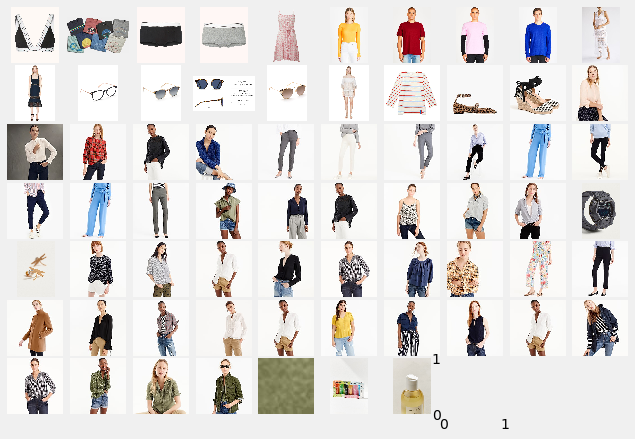

In [196]:
r,c=10,10
plt.figure(figsize = (r,c))
cnt = 900
gs1 = gridspec.GridSpec(r, c)
gs1.update(wspace=0.025, hspace=0.05)

# iterate in order to create a subplot
for i in range(r):
    for j in range(c):
        axs[i, j] = plt.subplot(gs1[i,j])
        if cnt<968:
            axs[i, j].imshow(X[cnt])
        axs[i, j].axis('off')
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        axs[i, j].set_aspect('equal')
        cnt += 1
plt.subplots_adjust(wspace=0, hspace=0)
save_fig(img_path,"products_9",False)